# Лабораторная работа #1
Выполнили:
* Меньшутин Алексей M3436
* Юрий Каменев M3436

## Задание №1
Реализуйте методы одномерного поиска: метод дихотомии, метод золотого сечения, метод Фибоначчи. Сравните их пол количеству итераций и количеству вычислений функции в зависимости от разной точности. Для каждого метода обязательно указывайте, как изменяется отрезок при переходе к следующей итерации.

Будем искать минимум функции $F = 4 - e^x + 2x^2$

### Метод дихотомии
1. Выбираем некоторый отрезок $ [a, b] $
2. Находим середину отрезка $c = \frac{(a + b)}{2}$
3. Вычисляем значение функции $F(c)$ в окрестностях $x$: $F_1 = F(c - \epsilon), F_2 = F(c + \epsilon)$
4. Сравниваем $F_1$ и $F_2$, отбрасываем одну из половин отрезка $[a, b]$.
5. Так как мы ищем минимум, если $F_1 < F_2$, то отбрасываем отрезок $[c, b]$. Иначе отбрасываем отрезок $[a, c]$
6. Повторяем процедуру до тех пор, пока длина отрезка не станет меньше заданной точности $\epsilon$

In [1]:
!{sys.executable} -m pip install numpy

/bin/bash: {sys.executable}: команда не найдена


In [2]:
import numpy as np

In [3]:
def f(x):
    # 4 - e^x + 2x^2
    return 4 - np.e ** x + 2 * x ** 2

def f_grad(x):
    # 4x - e^x
    return 4 * x - np.e ** x

start_point = -2.0
end_point = 2.0

In [4]:
def dichotomy(function, left_border, right_border, eps=1e-5):
    a = left_border
    b = right_border

    iterations = 0
    calculations = 0
    segments = [(a, b)]

    while abs(b - a) > eps:
        iterations += 1
        calculations += 2

        c = (a + b) / 2
        if function(c - eps) < function(c + eps):
            b = c
        else:
            a = c

        segments.append((a, b))

    c = (a + b) / 2
    return c, function(c), iterations, calculations, eps, segments

In [43]:
dichotomy(f, start_point, end_point, 1e-10)

(0.3574035658093635,
 2.825861921449314,
 36,
 72,
 1e-10,
 [(-2.0, 2.0),
  (0.0, 2.0),
  (0.0, 1.0),
  (0.0, 0.5),
  (0.25, 0.5),
  (0.25, 0.375),
  (0.3125, 0.375),
  (0.34375, 0.375),
  (0.34375, 0.359375),
  (0.3515625, 0.359375),
  (0.35546875, 0.359375),
  (0.35546875, 0.357421875),
  (0.3564453125, 0.357421875),
  (0.35693359375, 0.357421875),
  (0.357177734375, 0.357421875),
  (0.3572998046875, 0.357421875),
  (0.35736083984375, 0.357421875),
  (0.357391357421875, 0.357421875),
  (0.357391357421875, 0.3574066162109375),
  (0.35739898681640625, 0.3574066162109375),
  (0.3574028015136719, 0.3574066162109375),
  (0.3574028015136719, 0.3574047088623047),
  (0.3574028015136719, 0.3574037551879883),
  (0.3574032783508301, 0.3574037551879883),
  (0.3574035167694092, 0.3574037551879883),
  (0.3574035167694092, 0.35740363597869873),
  (0.3574035167694092, 0.35740357637405396),
  (0.35740354657173157, 0.35740357637405396),
  (0.35740356147289276, 0.35740357637405396),
  (0.35740356147289

### Метод золотого сечения

Говорят, что точка $c$ осуществляет золотое сечение отрезка $[a, b]$, если $\frac{b - a}{b - c} = \frac{b - c}{c - a} = \phi = \frac{1 + \sqrt{5}}{2}$

Теперь, сам алгоритм:
1. $c_1 = b - \frac{b - a}{\phi}$, $c_2 = a + \frac{b - a}{\phi}$
2. Повторять:
    * если $F(c_1) > F(c_2)$, то $a = c_1, c_1 = c_2, c_2 = b - (c_1 - a)$
    * если $F(c_1) \le F(c_2)$, то $b = c_2, c_2 = c_1, c_1 = a + (b - c_2)$
3. Пока $\frac{b - a}{2} \ge \epsilon$
4. Искомое значение равно $\frac{b + a}{2}$

In [10]:
def golden_ratio(function, left_border, right_border, eps=1e-5):
    phi = (1 + np.sqrt(5)) / 2
    a = left_border
    b = right_border
    iterations = 0
    calculations = 0
    segments = [(a, b)]

    c_1 = b - (b - a) / phi
    c_2 = a + (b - a) / phi

    calc_result = [function(c_1), function(c_2)]
    calculations += 2

    while (b - a) / 2 >= eps:
        iterations += 1
        calculations += 1
        if calc_result[0] > calc_result[1]:
            a = c_1
            c_1 = c_2
            c_2 = b - (c_1 - a)
            calc_result[0] = calc_result[1]
            calc_result[1] = function(c_2)
        else:
            b = c_2
            c_2 = c_1
            c_1 = a + b - c_2
            calc_result[1] = calc_result[0]
            calc_result[0] = function(c_1)
        segments.append((a, b))

    c = (b + a) / 2

    return c, function(c), iterations, calculations, eps, segments

In [45]:
golden_ratio(f, start_point, end_point, 1e-10)

(0.3574030285886727,
 2.8258619214488427,
 41,
 43,
 1e-10,
 [(-2.0, 2.0),
  (-0.47213595499957917, 2.0),
  (-0.47213595499957917, 1.0557280900008417),
  (0.11145618000168334, 1.0557280900008417),
  (0.11145618000168334, 0.6950483150029458),
  (0.11145618000168334, 0.47213595499957917),
  (0.2492235949962125, 0.47213595499957917),
  (0.2492235949962125, 0.38699100999074165),
  (0.30184606498190414, 0.38699100999074165),
  (0.33436854000505, 0.38699100999074165),
  (0.33436854000505, 0.3668910150281959),
  (0.3467910200656501, 0.3668910150281959),
  (0.3544685349675958, 0.3668910150281959),
  (0.3544685349675958, 0.36214604986954146),
  (0.3544685349675958, 0.3592135001262502),
  (0.3562809503829589, 0.3592135001262502),
  (0.3562809503829589, 0.35809336579832207),
  (0.35697323147039395, 0.35809336579832207),
  (0.35697323147039395, 0.35766551255782897),
  (0.35723765931733586, 0.35766551255782897),
  (0.35723765931733586, 0.3575020871642778),
  (0.3573386617707266, 0.3575020871642778)

### Метод Фибоначчи

In [11]:
def calculate_fibonacci(n):
    return int(((1 + np.sqrt(5)) ** n - (1 - np.sqrt(5)) ** n) / (2 ** n * np.sqrt(5)))

def find_fibonacci_number(a, b, l):
    left = 0
    right = 1000
    while left < right - 1:
        middle = int((left + right) / 2)
        if calculate_fibonacci(middle) > (b - a) / l:
            right = middle
        else:
            left = middle
    return right

def generate_fibonacci(n):
    sequence = []
    for i in range(n + 1):
        sequence.append(calculate_fibonacci(i))
    return sequence

In [13]:
def fibonacci(function, left_border, right_border, eps=1e-5):
    a = left_border
    b = right_border

    segments = [(a, b)]

    fib_number = find_fibonacci_number(a, b, eps)
    fibonacci_seq = generate_fibonacci(fib_number)

    c_1 = a + fibonacci_seq[fib_number - 2] / fibonacci_seq[fib_number] * (b - a)
    c_2 = a + fibonacci_seq[fib_number - 1] / fibonacci_seq[fib_number] * (b - a)

    k = 1
    calc_res = [function(c_1), function(c_2)]

    iterations = 0
    calculations = 2

    while True:
        iterations += 1
        if calc_res[0] > calc_res[1]:
            a = c_1
            c_1 = c_2
            c_2 = a + fibonacci_seq[fib_number - k - 1] / fibonacci_seq[fib_number - k] * (b - a)
            if k == fib_number - 2:
                break
            else:
                calc_res[0] = calc_res[1]
                calc_res[1] = function(c_2)
                calculations += 1
        else:
            b = c_2
            c_2 = c_1
            c_1 = a + fibonacci_seq[fib_number - k - 2] / fibonacci_seq[fib_number - k] * (b - a)
            if k == fib_number - 2:
                break
            else:
                calc_res[1] = calc_res[0]
                calc_res[0] = function(c_1)
                calculations += 1
        k += 1
        segments.append((a, b))

    c_2 = c_1 + eps
    calculations += 1
    if np.isclose(calc_res[0], function(c_2)):
        a = c_1
    else:
        b = c_2

    segments.append((a, b))
    c = (a + b) / 2

    return c, function(c), iterations, calculations, eps, segments

In [48]:
fibonacci(f, start_point, end_point, 1e-10)


(0.3574029416669157,
 2.825861921448836,
 51,
 53,
 1e-10,
 [(-2.0, 2.0),
  (-0.4721359549995794, 2.0),
  (-0.4721359549995794, 1.0557280900008414),
  (0.11145618000168256, 1.0557280900008414),
  (0.11145618000168256, 0.6950483150029445),
  (0.11145618000168256, 0.4721359549995796),
  (0.2492235949962147, 0.4721359549995796),
  (0.2492235949962147, 0.38699100999074687),
  (0.3018460649819141, 0.38699100999074687),
  (0.33436854000504745, 0.38699100999074687),
  (0.33436854000504745, 0.3668910150281809),
  (0.3467910200656149, 0.3668910150281809),
  (0.35446853496761344, 0.3668910150281809),
  (0.35446853496761344, 0.36214604986961196),
  (0.35446853496761344, 0.35921350012618236),
  (0.35628095038275276, 0.35921350012618236),
  (0.35628095038275276, 0.358093365797892),
  (0.3569732314696017, 0.358093365797892),
  (0.3569732314696017, 0.3576655125564507),
  (0.3572376593150093, 0.3576655125564507),
  (0.3572376593150093, 0.35750208716041687),
  (0.3573386617643831, 0.35750208716041687),

## Задание №2.
Реализуйте метод градиентного спуска и процедуру линейного поиска. Оцените,
как меняется скорость сходимости, если для поиска величины шага использовать различные методы одномерного поиска.

### Процедура линейного поиска

In [5]:
def linear_search(function, left, delta=1e-2, eps=1e-3, factor=2):
    start_value = function(left)
    cur_delta = delta
    right = left + cur_delta
    while function(right) <= start_value + eps:
        cur_delta *= factor
        right += cur_delta

    return right

### Метод градиентного спуска

In [65]:
import numpy.linalg

def gradient_descent(function, function_grad, cur_arg, step_calculation_method, eps=1e-4):
    gradient_trace = [cur_arg]
    while True:
        cur_grad = function_grad(cur_arg)
        gradient_step = step_calculation_method(function, cur_grad, cur_arg)
        next_arg = cur_arg - gradient_step * cur_grad
        gradient_trace.append(next_arg)
        cur_arg = next_arg

        if numpy.linalg.norm(cur_grad) < eps:
            return gradient_trace

In [16]:
def linear_step_calculation_method(method):

    def result(function, function_grad, arg):
        def linear_optimization_problem(k):
            return function(arg - k * function_grad)

        left_border = 0.
        right_border = linear_search(linear_optimization_problem, left_border)
        answer, _, _, _, _, _ = method(linear_optimization_problem, left_border, right_border)
        return answer

    return result

### Тестовая функция - функция Розенброка

In [17]:
def rosenbrock_function(arg):
    x = arg[0]
    y = arg[1]
    return 100 * ((y - x ** 2) ** 2) + ((1. - x) ** 2)

def rosenbrock_function_grad(arg):
    x = arg[0]
    y = arg[1]
    dx = 2 * (200 * (x ** 3) - 200 * x * y + x - 1)
    dy = 200 * (y - (x ** 2))
    return np.array([dx, dy])


In [67]:
rosenbrock_gradient_start_point = np.array([-10.0, 20.0])

linear_step_calculation_methods = [linear_step_calculation_method(method) for method in [dichotomy, golden_ratio, fibonacci]]
for method in linear_step_calculation_methods:
    trace = gradient_descent(rosenbrock_function, rosenbrock_function_grad, rosenbrock_gradient_start_point, method, 1e-5)
    print('answer =', trace[-1], 'steps =', len(trace))

answer = [0.99999048 0.99998089] steps = 123361
answer = [0.99998952 0.99997893] steps = 99647
answer = [0.99999586 0.9999917 ] steps = 7131


## Задание #3

Проанализируйте траекторию градиентного спуска для нескольких квадратичных функций: придумайте две-три квадратичные двумерные функции, на которых работа метода будет отличаться, нарисуйте графики с линиями уровня
функций и траекториями методов.
Попробуйте ответить на следующий вопрос: Как отличается поведение метода
в зависимости от числа обусловленности функции, выбора начальной точки и
стратегии выбора шага?

In [103]:
import matplotlib.pyplot as plt
from tqdm import tqdm

def draw_function(function, function_grad, start, method, show_trace_maker, x_min, x_max, x_step, y_min, y_max, y_step, levels, eps = 1e-4):
    trace = gradient_descent(function, function_grad, start, linear_step_calculation_method(method), eps)
    print('Answer =', trace[-1])
    print(len(trace), 'steps')
    trace_to_show = show_trace_maker(trace)

    x_s = np.arange(x_min, x_max, x_step)
    y_s = np.arange(y_min, y_max, y_step)
    z_s = np.array([[function(np.array([x, y])) for x in x_s] for y in y_s])

    plt.figure()
    cs = plt.contour(x_s, y_s, z_s, levels=levels)
    for i in tqdm(range(len(trace_to_show) - 1)):
        cur_point = trace_to_show[i]
        next_point = trace_to_show[i + 1]
        plt.scatter([cur_point[0]], [cur_point[1]])
        plt.plot([cur_point[0], next_point[0]], [cur_point[1], next_point[1]])
    plt.grid()
    plt.show()

In [93]:
methods = [golden_ratio, fibonacci]

In [88]:
def sum_squares_function(args):
    return np.sum(args ** 2)

def sum_squares_function_grad(args):
    return 2 * args

sum_squares_start_point = np.array([-5.0, 5.0])

Answer = [ 2.76652189e-10 -2.76652189e-10]
3 steps
Answer = [-1.58940775e-10  1.58940775e-10]
3 steps


100%|██████████| 2/2 [00:00<00:00, 395.47it/s]


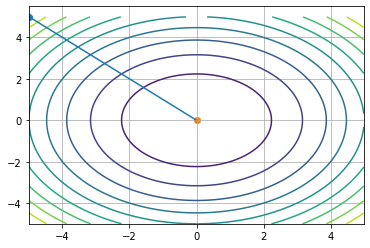

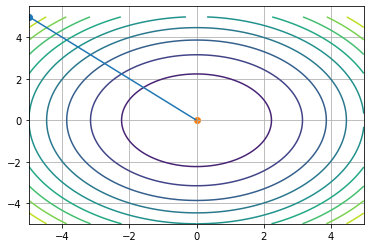

In [91]:
for method in methods:
    draw_function(sum_squares_function,
                  sum_squares_function_grad,
                  start=sum_squares_start_point,
                  method=method,
                  show_trace_maker=lambda trace: trace,
                  x_min=-5,
                  x_max=5,
                  x_step=0.01,
                  y_min=-5,
                  y_max=5,
                  y_step=0.01,
                  levels=10,
    )

In [99]:
def random_function(args):
    x = args[0]
    y = args[1]
    # 6x^2 + 7y^2 - 3 + 7x
    return 6 * x ** 2 + 7 * y ** 2 + 7 * x - 3

def random_function_grad(args):
    x = args[0]
    y = args[1]
    dx = 12 * x + 7
    dy = 7 * y
    return np.array([dx, dy])

random_function_start_point = np.array([-5.0, 5.0])

Answer = [-5.83362543e-01  9.43685495e-07]
114 steps
Answer = [-5.83333331e-01 -1.37959307e-11]
18 steps
Answer = [-5.83333333e-01  4.22113616e-09]
18 steps


100%|██████████| 17/17 [00:00<00:00, 516.11it/s]


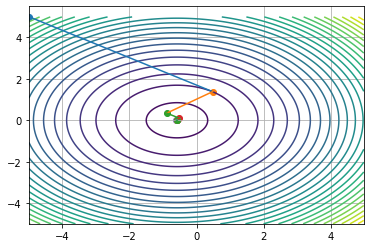

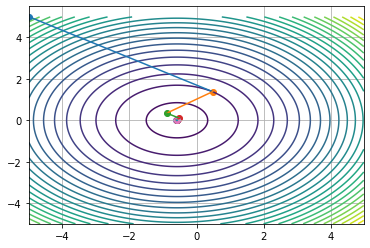

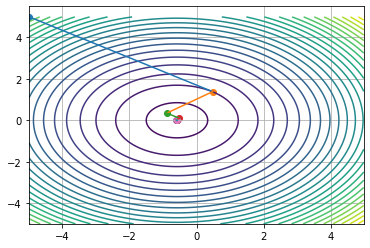

In [105]:
methods = [dichotomy, golden_ratio, fibonacci]

for method in methods:
    draw_function(random_function,
                  random_function_grad,
                  start=sum_squares_start_point,
                  method=method,
                  show_trace_maker=lambda trace: trace,
                  x_min=-5,
                  x_max=5,
                  x_step=0.01,
                  y_min=-5,
                  y_max=5,
                  y_step=0.01,
                  levels=30,
                  eps=1e-7
    )